## Cosine Similarity Calculations
Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Similarity measures have a multiude of uses in machine learning projects; they come in handy when matching strings, measuring distance, and extracting features. This similarity measurement is particularly concerned with orientation, rather than magnitude. 
In this case study, you'll use the cosine similarity to compare both a numeric data within a plane and a text dataset for string matching.

Load the Python modules, including cosine_similarity, from sklearn.metrics.pairwise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

**<font color='teal'> Load the distance dataset into a dataframe. </font>**

In [2]:
# Load dataset into DataFrame
data_path = r"C:\Users\OR0293533\Downloads\1585686145_CosineSimilarityCaseStudy\CosineSimilarityCaseStudy\distance_dataset (1).csv"
df = pd.read_csv(data_path)
df.head()

,Unnamed: 0,X,Y,Z,ClusterID
0,0,5.135779,4.167542,5.787635,4
1,1,4.280721,5.770909,6.091044,4
2,2,8.329098,7.540436,3.247239,2
3,3,5.470224,5.069249,5.768313,4
4,4,2.381797,2.402374,3.879101,1


### Cosine Similarity with clusters and numeric matrices

All points in our dataset can be thought of as feature vectors. We illustrate it here as we display the __Cosine Similarity__ between each feature vector in the YZ plane and the [5, 5] vector we chose as reference. The sklearn.metrics.pairwise module provides an efficient way to compute the __cosine_similarity__ for large arrays from which we can compute the similarity.

 **<font color='teal'> First, create a 2D and a 3D matrix from the dataframe. The 2D matrix should contain the 'Y' and 'Z' columns and the 3D matrix should contain the 'X','Y', and 'Z' columns.</font>**

In [3]:
# Create required 2D (Y,Z) and 3D (X,Y,Z) matrices
matYZ = df[["Y","Z"]].to_numpy()
mat   = df[["X","Y","Z"]].to_numpy()
matYZ.shape, mat.shape

((2000, 2), (2000, 3))

Calculate the cosine similarity for those matrices with reference planes of 5,5 and 5,5,5. Then subtract those measures from 1 in new features.

In [4]:
# Compute cosine distances for 2D and 3D matrices
import numpy as np
from sklearn.metrics.pairwise import cosine_distances

if 'matYZ' not in globals():
    matYZ = df[["Y","Z"]].to_numpy()
if 'mat' not in globals():
    mat = df[["X","Y","Z"]].to_numpy()

ref2 = np.array([[5, 5]])
ref3 = np.array([[5, 5, 5]])
simCosine  = cosine_distances(matYZ, ref2)
simCosine3D = cosine_distances(mat,  ref3)
simCosine[:5], simCosine3D[:5]

(array([[0.0129846 ],
        [0.00036399],
        [0.0708751 ],
        [0.0020739 ],
        [0.02653907]]),
 array([[0.00864045],
        [0.01057566],
        [0.05626938],
        [0.00138525],
        [0.02822497]]))

Using the 2D matrix and the reference plane of (5,5) we can use a scatter plot to view the way the similarity is calculated using the Cosine angle.

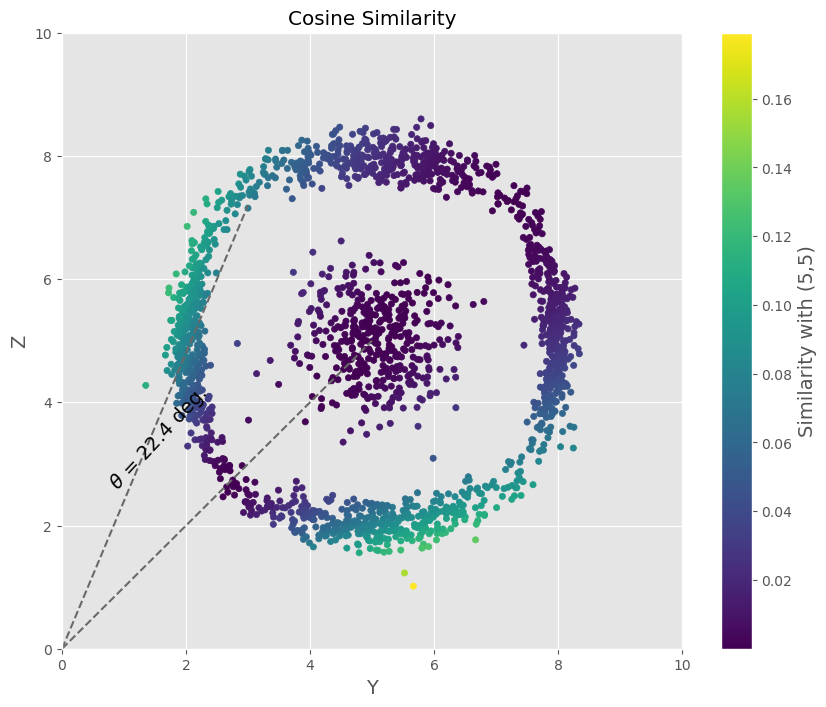

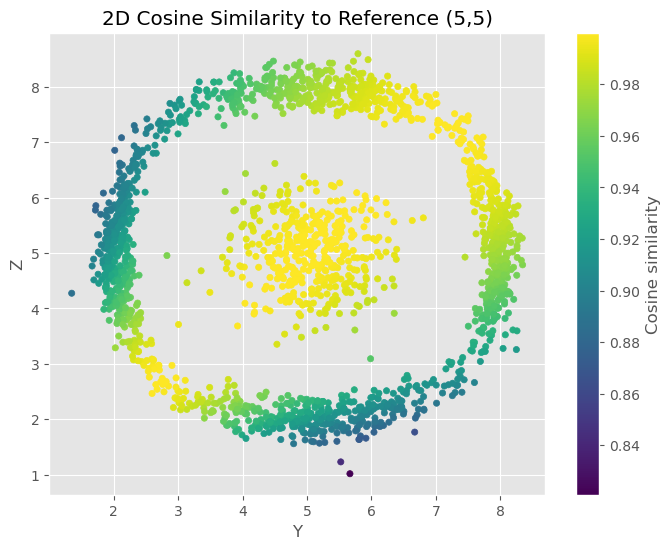

In [6]:
matYZ = df[["Y", "Z"]].to_numpy()
ref2 = np.array([[5, 5]])

# Cosine similarity to the reference point
simCosine = cosine_similarity(matYZ, ref2)[:, 0]

plt.figure(figsize=(8,6))
plt.scatter(df["Y"], df["Z"], c=simCosine, s=20)
plt.xlabel("Y")
plt.ylabel("Z")
plt.title("2D Cosine Similarity to Reference (5,5)")
plt.colorbar(label="Cosine similarity")
plt.show()

Now, plot the 3D matrix with the similarity and the reference plane, (5,5,5).

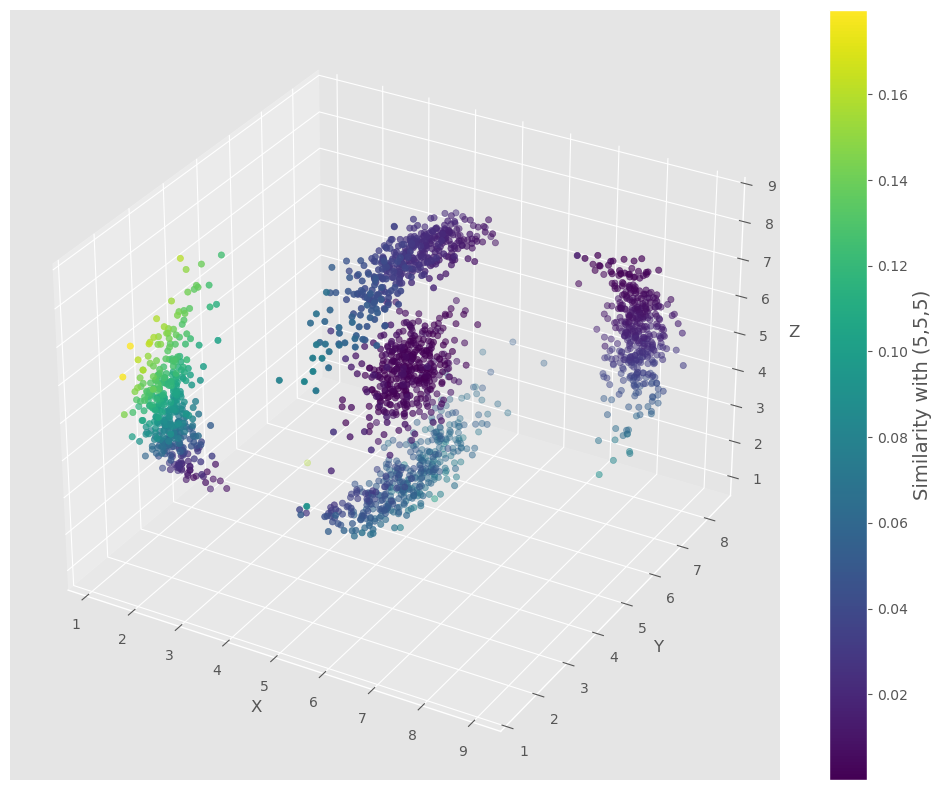

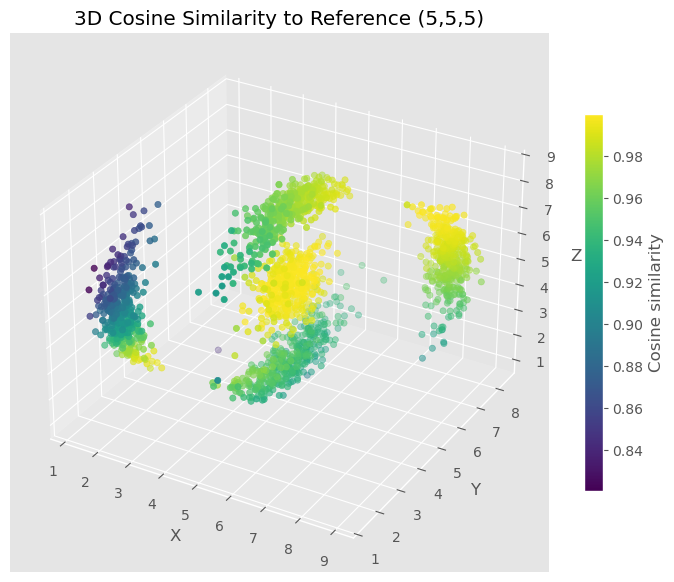

In [8]:
# 3D cosine similarity scatter vs reference (5,5,5)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D projection)

# Load the dataset if needed
if 'df' not in globals():
    df = pd.read_csv("/mnt/data/distance_dataset (1).csv")

# Build 3D matrix (X, Y, Z) and reference point (5,5,5)
mat = df[["X", "Y", "Z"]].to_numpy()
ref3 = np.array([[5, 5, 5]])

# Cosine similarity to the reference
simCosine3D = cosine_similarity(mat, ref3).ravel()

# 3D scatter plot
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(df["X"], df["Y"], df["Z"], c=simCosine3D, s=20)
ax.scatter([5], [5], [5], s=80, marker='^')  # reference point
ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlabel("Z")
ax.set_title("3D Cosine Similarity to Reference (5,5,5)")
fig.colorbar(p, ax=ax, shrink=0.7, label="Cosine similarity")
plt.show()


----

### Cosine Similarity with text data
This is a quick example of how you can use Cosine Similarity to compare different text values or names for record matching or other natural language proecessing needs. 
First, we use count vectorizer to create a vector for each unique word in our Document 0 and Document 1. 

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# corpus must be strings
corpus = [
    "Machine learning enables computers to learn from data.",
    "Deep learning is a subset of machine learning."
]

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(corpus)

# Handle both new and old scikit-learn versions
try:
    vocab = count_vect.get_feature_names_out()
except AttributeError:
    vocab = count_vect.get_feature_names()

pd.DataFrame(X_train_counts.toarray(), columns=vocab, index=['Document 0','Document 1'])


,computers,data,deep,enables,from,is,learn,learning,machine,of,subset,to
Document 0,1,1,0,1,1,0,1,1,1,0,0,1
Document 1,0,0,1,0,0,1,0,2,1,1,1,0


Now, we use a common frequency tool called TF-IDF to convert the vectors to unique measures.

In [11]:
# Ensure `corpus` exists before TF-IDF
if 'corpus' not in globals():
    corpus = [
        'Machine learning enables computers to learn from data.',
        'Deep learning is a subset of machine learning.'
    ]
len(corpus)

2

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Define/ensure corpus exists
corpus = [
    "Machine learning enables computers to learn from data.",
    "Deep learning is a subset of machine learning."
]

vectorizer = TfidfVectorizer()
trsfm = vectorizer.fit_transform(corpus)

# Handle both new and old scikit-learn versions
try:
    vocab = vectorizer.get_feature_names_out()
except AttributeError:
    vocab = vectorizer.get_feature_names()

pd.DataFrame(trsfm.toarray(), columns=vocab, index=['Document 0', 'Document 1'])


,computers,data,deep,enables,from,is,learn,learning,machine,of,subset,to
Document 0,0.377628,0.377628,0.000000,0.377628,0.377628,0.000000,0.377628,0.268685,0.268685,0.000000,0.000000,0.377628
Document 1,0.000000,0.000000,0.391294,0.000000,0.000000,0.391294,0.000000,0.556817,0.278409,0.391294,0.391294,0.000000


Here, we finally apply the __Cosine Similarity__ measure to calculate how similar Document 0 is compared to any other document in the corpus. Therefore, the first value of 1 is showing that the Document 0 is 100% similar to Document 0 and 0.26055576 is the similarity measure between Document 0 and Document 1.

In [14]:
cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.22441294]])

Replace the current values for `Document 0` and `Document 1` with your own sentence or paragraph and apply the same steps as we did in the above example.

 **<font color='teal'> Combine the documents into a corpus.</font>**

In [ ]:
# Combine sentences/paragraphs into a corpus
corpus = [
    "Machine learning enables computers to learn from data.",
    "Deep learning is a subset of machine learning."
]
corpus

 **<font color='teal'> Apply the count vectorizer to the corpus to transform it into vectors.</font>**

In [ ]:
# Transform corpus into count vectors
from sklearn.feature_extraction.text import CountVectorizer
count_v = CountVectorizer()
X_counts = count_v.fit_transform(corpus)
X_counts.shape

 **<font color='teal'> Convert the vector counts to a dataframe with Pandas.</font>**

In [ ]:
# Convert counts to a DataFrame
counts_df = pd.DataFrame(X_counts.toarray(), columns=count_v.get_feature_names_out())
counts_df

 **<font color='teal'> Apply TF-IDF to convert the vectors to unique frequency measures.</font>**

In [ ]:
# Apply TF-IDF weighting
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
X_tfidf = tfidf.fit_transform(X_counts)
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=count_v.get_feature_names_out())
tfidf_df

 **<font color='teal'> Use the cosine similarity function to get measures of similarity for the sentences or paragraphs in your original document.</font>**

In [ ]:
# Cosine similarity between documents (TF-IDF space)
from sklearn.metrics.pairwise import cosine_similarity
sim_mat = cosine_similarity(X_tfidf)
pd.DataFrame(
    sim_mat,
    index=[f"Document {i}" for i in range(len(corpus))],
    columns=[f"Document {i}" for i in range(len(corpus))]
)